# Car Price Prediction and Analysis

Author: Himanshu Virwani

Source: https://www.kaggle.com/datasets/ander289386/cars-germany

Situation: You are a Data Analyst at "Check25" a company that sells used cars. The cars are directy bought from the owners and are then sold to customers after a mandatory service. Your manager wants you to analyse the dataset of the company and give useful insights whether the price is justified based on car's features. Let's dive deep into Business problem.

# Business Problem
Automobile businesses, which usually sell used cars, have always had problems with selling. It’s the same for Check25 too. Since June, the organization lost €250,000 in revenue as sales have declined 15%. The inefficiencies in working with the data available today have caused a problem wherein we could not understand customer preferences and pricing. Those challenges have affected the customers, the company's position on the market.


To address these issues, Check25 aims to:

1. Find out the top 10 cars by their features.
2. Find trends between price and mileage of cars.
3. Find out the most common fuel types used on cars.
4. ind out relationship between age and price of cars.
5. Find the makers with the largest number of cars within the organization’s inventory.
6. Find those car features that are of strong correlation to one another.
7. Practically, build a predictive model for car prices using linear regression and find Mean Square Error, Root Mean Square Error R-Squared value of the model and predict accurately.

These issues will be resolved and this will help the company to put in place the right operations, attract more customers, and redress the lost market share.



# Analytical Problem
The first step is only to define the business problem. What alone cannot fully address the company's challenges is predicting car prices. A more comprehensive analysis is required to uncover actionable insights, including:
Trends of value for customers by comparing average car price with mileage.An examination of how different types of fuel affect car prices and customers’ preferences, especially now that there’s a growing need for green vehicles.

Investigating the relationship between car price and car age to understand depreciation, and its effect on customer decisions.
To focus scarce resources in prioritizing those that impact customer purchase behavior.The company has kept track of how cars older than 5 years are pricing 20 percent cheaper than the rest of the market, and how diesel cars, which account for 40 percent of the inventory, are not selling as fast.

An integration of these insights with a predictive price model based on linear regression can help Check25 predict whether the car pricing strategies are making an impact on customer satisfaction and loyalty.

# 3. Allocation

We have discovered the Business as well as the Analytics problem. Now we will try to work on a kaggle dataset which is closely related to finding solution to our problem.However,this dataset is not the largest one available on web but online resources are sufficient enough to solve our business problem.

# 4. Analytics
To fix the issue. We will now start data cleaning and preprocessing which is followed by other necessary steps of analysis.

# Data Cleaning and Preprocessing

In [1203]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [1204]:
df = pd.read_csv(r"C:\Users\HIMANSHU VIRWANI\Desktop\autoscout24-germany-dataset.csv")

In [1205]:
df.head()

,Milage,Manufacturer,Model,Fuel_Type,Gear_Type,Offer_Type,Price,Horsepower,Year_of_Manufacturing
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [1206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Milage                 46405 non-null  int64  
 1   Manufacturer           46405 non-null  object 
 2   Model                  46262 non-null  object 
 3   Fuel_Type              46405 non-null  object 
 4   Gear_Type              46223 non-null  object 
 5   Offer_Type             46405 non-null  object 
 6   Price                  46405 non-null  int64  
 7   Horsepower             46376 non-null  float64
 8   Year_of_Manufacturing  46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [1207]:
#Adding a new column 'Age of Car'
df['Age_of_Car'] = 2024 - df['Year_of_Manufacturing'] 

In [1208]:
print(df['Fuel_Type'].unique()) 

['Diesel' 'Gasoline' 'Electric/Gasoline' '-/- (Fuel)' 'Electric'
 'Electric/Diesel' 'CNG' 'LPG' 'Others' 'Hydrogen' 'Ethanol']


In [1209]:
# Counting the number of rows with 'Unknown Fuel' in the Fuel_Type column
unknown_fuel_count = df[df['Fuel_Type'] == '-/- (Fuel)'].shape[0]



In [1210]:
# Displaying all rows with 'Unknown Fuel' in the Fuel_Type column
unknown_fuel_rows = df[df['Fuel_Type'] == 'Unknown Fuel']
print(f'There are {unknown_fuel_count} rows with "Unknown Fuel".')


There are 26 rows with "Unknown Fuel".


In [1211]:
#Eleminating unknown fuel type 
df = df[df['Fuel_Type'] != '-/- (Fuel)']

In [1212]:
df.shape

(46379, 10)

In [1213]:
# Finding null values in our datasset
print("Missing values before cleaning:\n", df.isnull().sum())


Missing values before cleaning:
 Milage                     0
Manufacturer               0
Model                    143
Fuel_Type                  0
Gear_Type                180
Offer_Type                 0
Price                      0
Horsepower                25
Year_of_Manufacturing      0
Age_of_Car                 0
dtype: int64


In [1214]:
df.dropna(subset=['Model', 'Gear_Type', 'Horsepower'], inplace=True)

In [1215]:
print("Missing values after cleaning:\n", df.isnull().sum())

Missing values after cleaning:
 Milage                   0
Manufacturer             0
Model                    0
Fuel_Type                0
Gear_Type                0
Offer_Type               0
Price                    0
Horsepower               0
Year_of_Manufacturing    0
Age_of_Car               0
dtype: int64


# Exploratory Data Analysis

In [1217]:
# Normalizing the features
scaler = MinMaxScaler()

In [1218]:
# Listing of features to be considered
features = ['Milage', 'Price', 'Horsepower', 'Age_of_Car']

In [1219]:
# Normalizing the selected features
df_normalized = df.copy()
df_normalized[features] = scaler.fit_transform(df[features])

In [1220]:
# Assigning weights to each feature
weights = {
    'Milage': 0.3,
    'Price': 0.3,
    'Horsepower': 0.2,
    'Age_of_Car': 0.2
}

In [1221]:
# Computing the composite score
df_normalized['Composite_Score'] = (df_normalized['Milage'] * weights['Milage'] +
                                    df_normalized['Price'] * weights['Price'] +
                                    df_normalized['Horsepower'] * weights['Horsepower'] +
                                    df_normalized['Age_of_Car'] * weights['Age_of_Car'])

        Manufacturer      Model    Milage     Price  Horsepower  Age_of_Car  \
21675        Ferrari        F12  0.000388  1.000000    0.911661         0.4   
34744  Mercedes-Benz   Sprinter  0.629100  0.002411    0.190813         1.0   
24389           Audi         R8  0.009900  0.245162    0.939929         0.8   
34487  Mercedes-Benz        SLS  0.088110  0.121622    0.671378         1.0   
12036           Audi         Q7  0.238500  0.015757    0.587750         1.0   
34488  Mercedes-Benz        SLS  0.013361  0.182599    0.671378         1.0   
18458        Ferrari         FF  0.068400  0.107457    0.775029         0.9   
23326    Lamborghini  Aventador  0.012620  0.290874    0.883392         0.6   
19451            BMW         M5  0.210600  0.024942    0.658422         0.9   
12022        Porsche    Cayenne  0.269870  0.013255    0.469965         1.0   

       Composite_Score  
21675         0.562449  
34744         0.427616  
24389         0.424504  
34487         0.397195  
12036

C:\Users\HIMANSHU VIRWANI\AppData\Local\Temp\ipykernel_27520\1452679512.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Composite_Score', y='Model', data=top_10_cars, palette='husl')


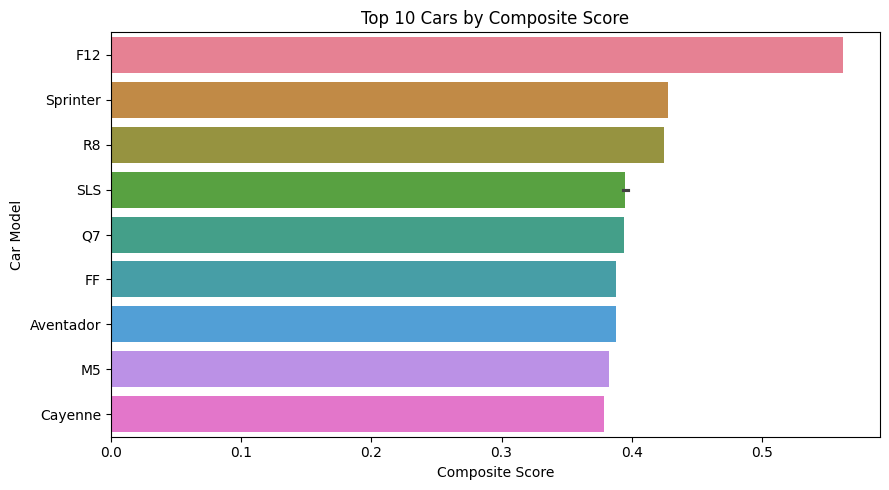

In [1222]:
top_10_cars = df_normalized.sort_values(by='Composite_Score', ascending=False).head(10)
print(top_10_cars[['Manufacturer', 'Model', 'Milage', 'Price', 'Horsepower', 'Age_of_Car', 'Composite_Score']])
# Creating a horizontal bar plot using seaborn
plt.figure(figsize=(9, 5))
sns.barplot(x='Composite_Score', y='Model', data=top_10_cars, palette='husl')
plt.xlabel('Composite Score')
plt.ylabel('Car Model')
plt.title('Top 10 Cars by Composite Score')
plt.gca().set_axisbelow(True)
plt.tight_layout()
plt.show()



C:\Users\HIMANSHU VIRWANI\AppData\Local\Temp\ipykernel_27520\737651452.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mileage_avg_price = df.groupby('Mileage_Category')['Price'].mean()


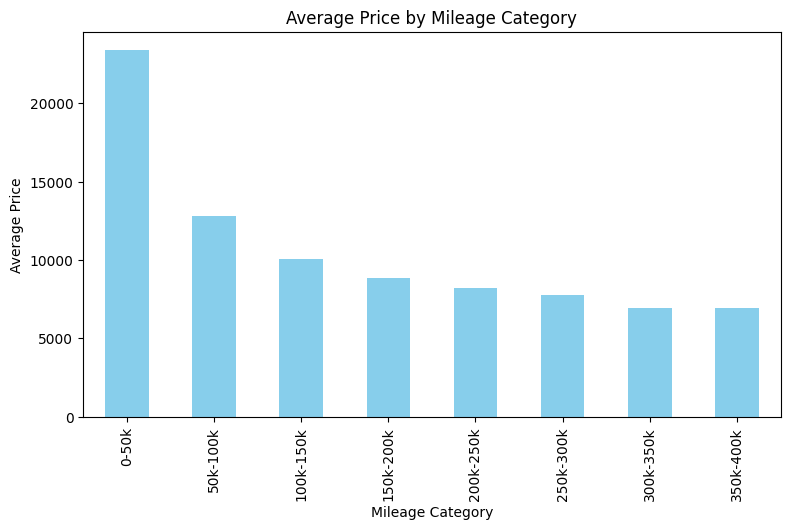

In [1223]:
# Calculating the average price for each mileage category
df['Mileage_Category'] = pd.cut(
    df['Milage'],
    bins=[0, 50000, 100000, 150000, 200000, 250000, 300000, 350000, 400000],
    labels=['0-50k', '50k-100k', '100k-150k', '150k-200k', '200k-250k', '250k-300k', '300k-350k', '350k-400k']
)

mileage_avg_price = df.groupby('Mileage_Category')['Price'].mean()

# Plotting the bar graph
plt.figure(figsize=(9, 5))
mileage_avg_price.plot(kind='bar', color='skyblue')
plt.title('Average Price by Mileage Category')
plt.xlabel('Mileage Category')
plt.ylabel('Average Price')
plt.show()

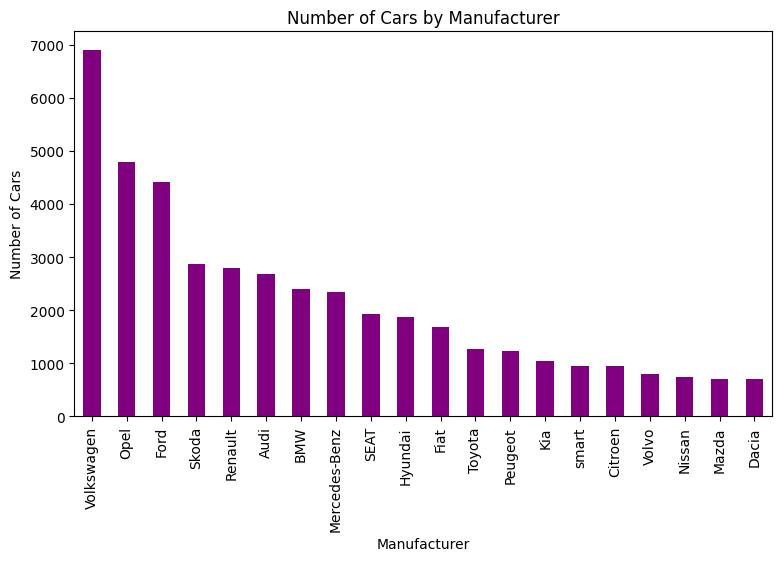

In [1224]:
car_count = df['Manufacturer'].value_counts().head(20)

# Plotting the data 
plt.figure(figsize=(9, 5)) 
car_count.plot(kind='bar',color='purple') 
plt.title('Number of Cars by Manufacturer') 
plt.xlabel('Manufacturer') 
plt.ylabel('Number of Cars') 
plt.xticks(rotation=90) 
plt.show()

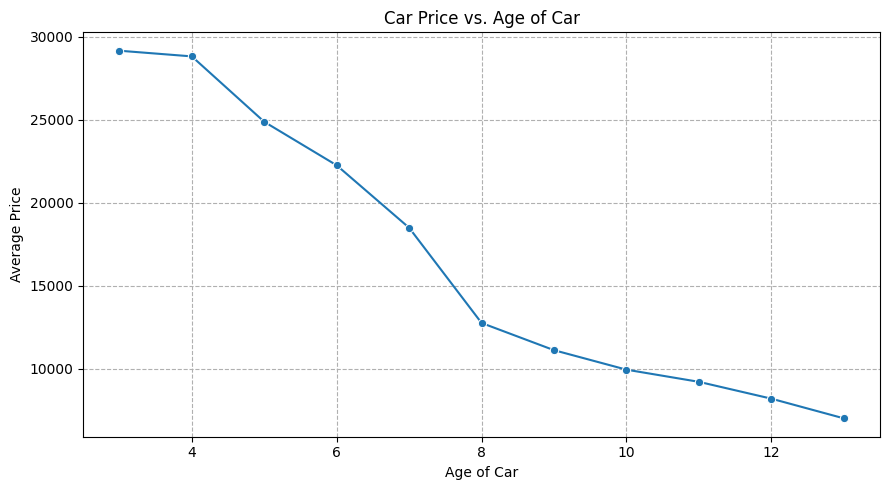

In [1225]:
# Calculating the average price for each age of car
average_price_per_age = df.groupby('Age_of_Car')['Price'].mean().reset_index()

# Creating the line plot using seaborn
plt.figure(figsize=(9, 5))
sns.lineplot(x='Age_of_Car', y='Price', data=average_price_per_age, marker='o')
plt.xlabel('Age of Car')
plt.ylabel('Average Price')
plt.title('Car Price vs. Age of Car')
plt.grid(True, linestyle='--')  # Add grid lines for better readability
plt.tight_layout()
plt.show()


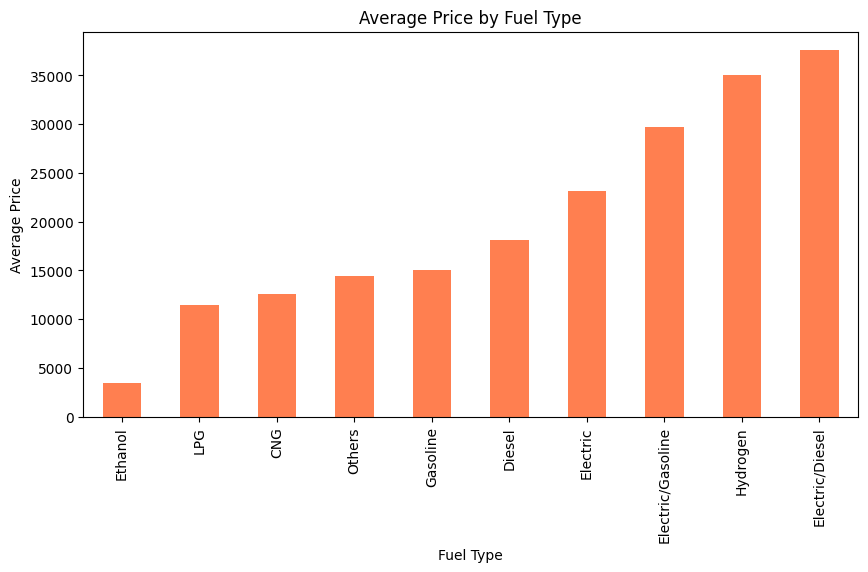

In [1226]:
fuel_type_avg_price = df.groupby('Fuel_Type')['Price'].mean().sort_values()
plt.figure(figsize=(10, 5))
fuel_type_avg_price.plot(kind='bar', color='coral')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

# Findings
1. The highest number of cars are having milage between 0 and 50k.
2. Price of car decreases as the age of car increases.
3. There are maximum number of cars from Volkswagen manufacturer.
4. Electronic/Diesel cars are having maximum price and the cheapest is Ethanol.

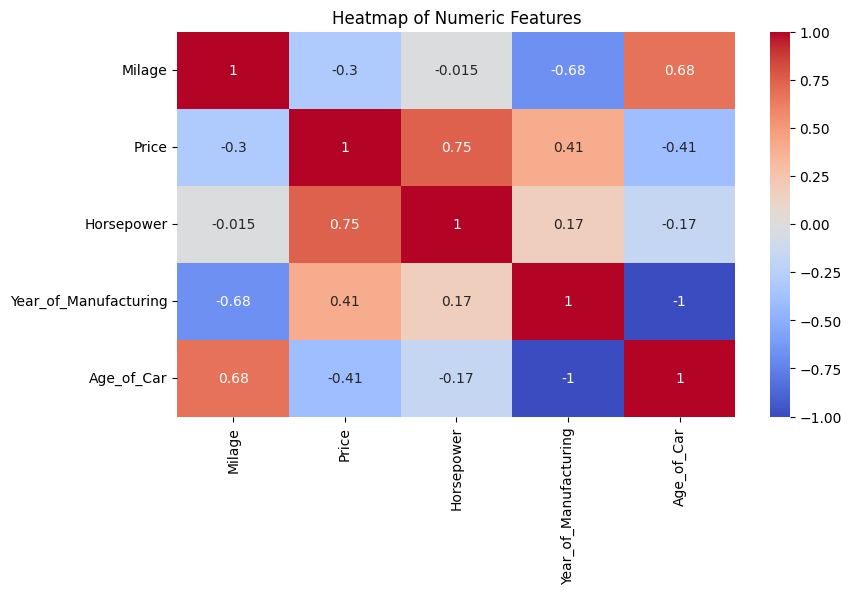

In [1228]:
# Selecting only the numeric columns, including 'Age_of_Car'
numeric_columns = df.select_dtypes(include=[np.number])

# Computing the correlation matrix
corr_matrix = numeric_columns.corr()

# Creating a heatmap
plt.figure(figsize=(9, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Heatmap of Numeric Features')
plt.show()

The above heatmap shows corellation between the following features of car:
1. Price and Horsepower
2. Age_of_car and Milage
3. Year_of_Manufacturing and Price
4. Year_of_Manufacturing and Horsepower

# Feature Engineering for Price Prediction

In [1231]:
# List of categorical columns
categorical_columns = ['Manufacturer', 'Model', 'Fuel_Type', 'Gear_Type', 'Offer_Type']

# Performing one-hot encoding on all categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Displaying the first few rows to confirm the encoding
print(df.head())


   Milage  Price  Horsepower  Year_of_Manufacturing  Age_of_Car  \
0  235000   6800       116.0                   2011          13   
1   92800   6877       122.0                   2011          13   
2  149300   6900       160.0                   2011          13   
3   96200   6950       110.0                   2011          13   
4  156000   6950       156.0                   2011          13   

  Mileage_Category  Manufacturer_Aixam  Manufacturer_Alfa  \
0        200k-250k               False              False   
1         50k-100k               False              False   
2        100k-150k               False              False   
3         50k-100k               False              False   
4        150k-200k               False              False   

   Manufacturer_Alpina  Manufacturer_Alpine  ...  Fuel_Type_Gasoline  \
0                False                False  ...               False   
1                False                False  ...                True   
2             

In [1232]:
# Displaying data type of a specific column
df = df.drop(columns=['Mileage_Category'])


In [1233]:
# Selecting  features and target
X = df.drop(columns=['Price'])
y = df['Price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [1234]:
# Creating a Linear Regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)


In [1235]:
# Calculating Mean Squared Error, Root Mean Squared Error and R-squared
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f'R-squared: {r2}')


Mean Squared Error: 41749942.62019733
Root Mean Squared Error (RMSE): 6461.42
R-squared: 0.8773808894963998


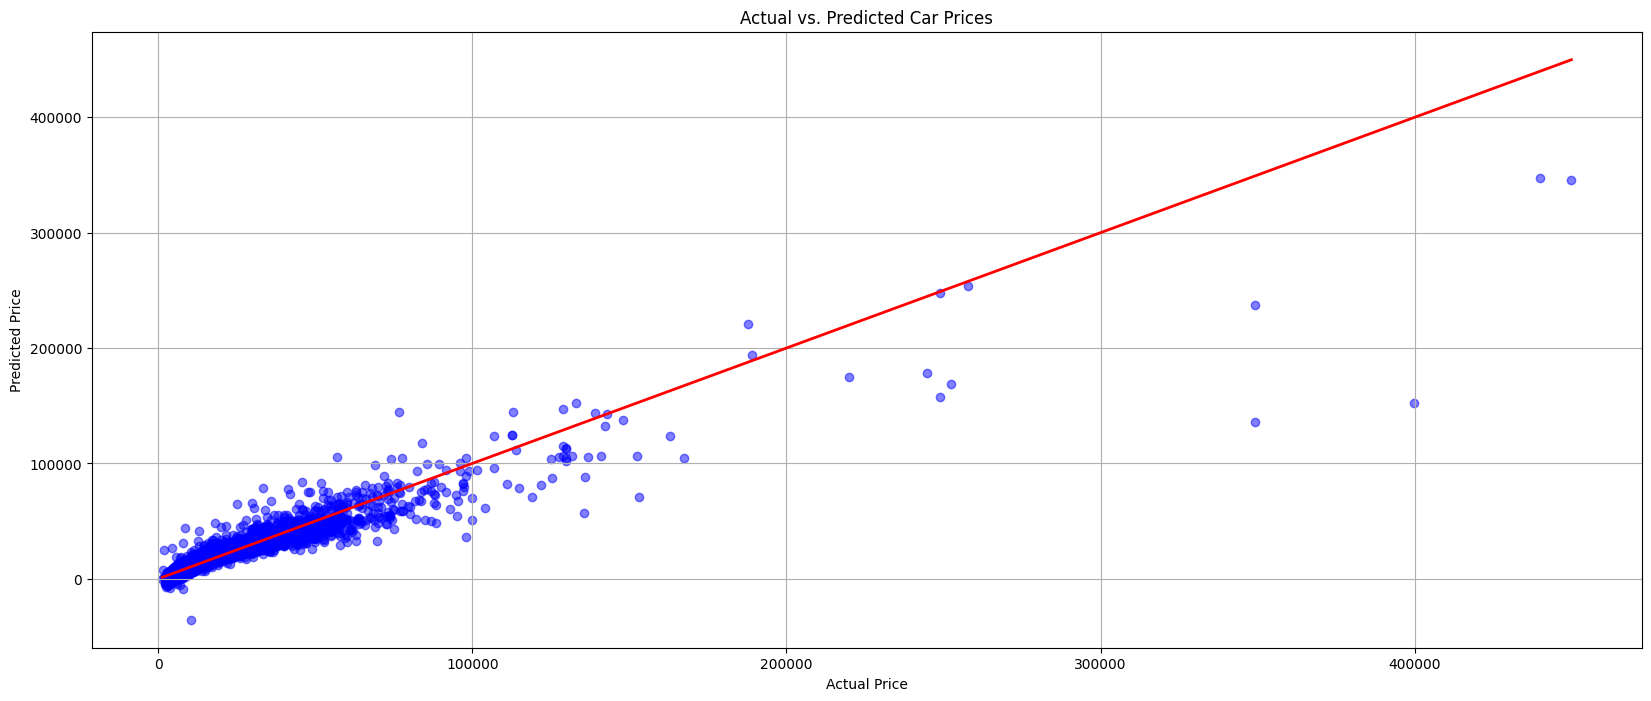

In [1236]:
# Ploting actual vs. predicted prices with grid lines
plt.figure(figsize=(20, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.grid(True) 

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Car Prices')
plt.show()


The graph suggests that the predictive model for car prices is relatively accurate, however there may be some outliers or cases where the predictions are less precise.

# 6. Future aspects of this project.
Since MSE of this model is very high, we can try other regression models such as random Forest, Gradient Boost and many more to find more accurate results.